## LLM on a Living Brain -- Creating a Simulated Elon Musk on X 

### Project Overview

This notebook contains a demo code for simulating Elon Musk on X (Twitter) through a sophisticated dual-system architecture.

Bridging artificial intelligence with living neural networks

#### Two Main Components

##### 1. Consciousness: Linguistic Intelligence
**Model**: Llama 3.2 3B
**Method**: LoRA fine-tuning
**Training Data**: 50K tweets from Elon Musk's X timeline

##### 2. Subconsciousness: Neural Organoid System
**Composition**: Four living brain organoids from FinalSpark
**Technology**: Programmable electric trigger and output reading system

#### Technical Details

| Component | Specification |
|-----------|---------------|
| LLM Model | Llama 3.2 3B with LoRA Fine-tuning|
| Neural Interface | 4-Organoid Programmable System for Subconsciousness modeling|



In [1]:
%autoawait asyncio
from datetime import timedelta, datetime, timezone
import numpy as np
import time
from neuroplatformv2.core.trigger import TriggerController
from neuroplatformv2.core.database import (
    DatabaseController,
    TriggersQuery,
    SpikeCountQuery,
    SpikeEventQuery,
    RawSpikeQuery,
    get_raw_spike,
)
from neuroplatformv2.core.intan import IntanController
from neuroplatformv2.utils.schemas import (
    StimParam,
    StimPolarity,
    StartRawRecordingRequest,
)

from src.organoid import OrganoidSystem
from src.elon_v3 import MuskResponseGenerator
generator = MuskResponseGenerator()

/home/alpvision/Documents/neuroplatform/sample/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


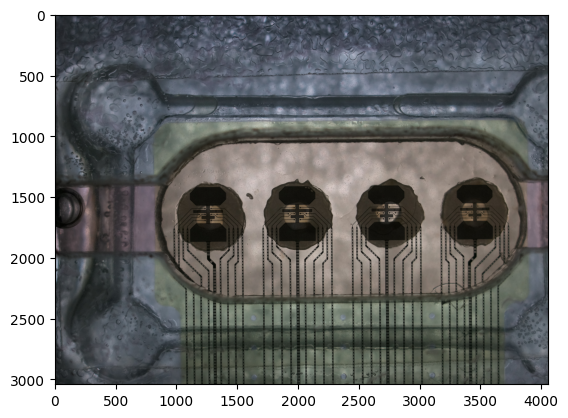

In [12]:
### Display the current snapshot of the organoid system using still camera 


from neuroplatformv2.core.camera import CameraController
from neuroplatformv2.utils.enumerations import MEA
import matplotlib.pyplot as plt

cam = CameraController(mea=MEA.Eight)
lastcapture = await cam._last_capture()
if len(lastcapture) > 0:
    lastcapture = lastcapture.iloc[0]["id"]
    img = cam._image_from(lastcapture)
    plt.imshow(img)

plt.savefig("organoid_snapshot.png")

In [13]:
## Initializing the system twice will crash it. Needs to re-start intan service before re-initializing the OrganoidSystem. 
global system
system = OrganoidSystem()
await system.initialize_system()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


System initialized successfully


True

In [14]:


generator = MuskResponseGenerator()

# Define test tweets
tweets = [
    "DOGE is going to the moon! 🚀",
    "Just bought some DOGEcoin for the first time!",
    "ACTIVIST JUDGE WHO BLOCKED TRUMP'S SPENDING FREEZE HAS HIDDEN MONEY TIES Federal Judge John McConnell failed to disclose his role at Crossroads Rhode Island while ruling against Trump's spending freeze.  His non-profit received $128M in government funding during his 18-year board tenure, including $42M from 2020-2023. Rhode Island, a plaintiff in the case, already sent his organization $2.9M in 2025.  The judge ordered federal funds to keep flowing to states—and coincidentally, to his own non-profit. Federal law requires judges to recuse themselves when their impartiality might be questioned.  Wonder why he didn't.Source: @America1stLegal",
    #"A post on…paper checks! -Treasury processed 116 million paper checks in FY2024. -In FY2023, $25 billion in tax refunds were delayed or lost due to returned or expired checks. -Treasury maintains a physical lockbox network to collect checks for tax (IRS), passport (State Department), etc.  It costs approximately $2.40 per check to maintain this lockbox network. -Deleting paper checks would save at least $750 million per year.",
    #"Physics teaches you to reason from first principles rather than by analogy."
]

for tweet in tweets:
    print(f"Processing tweet: {tweet}")

    
    # Compute triggers for the tweet
    trigger_values = system.compute_tweet_triggers(tweet)

    # Send the computed triggers
    await system.send_triggers(trigger_values)
    print(f"Trigger values sent: {trigger_values}")
    
    # Get organoid response
    print(f"Reading latest organoid activities ..")
    organoid_response = await system.get_organoid_status(seconds=5)
    time.sleep(1) # wait until we see organoid responses on IntanRHX
    
    
    # Use Fine-tuned Llama3 to generate a response
    print("Generating contextual LLM response ..")
    response = generator.generate_response_with_timeout(tweet, organoid_response=organoid_response)
    
    

    # Print tweet and trigger details
    
    
    
    print(f"LLM Response: {response}" if response else "[No response]")
    print("\n" + "="*50)
    time.sleep(2)

Processing tweet: DOGE is going to the moon! 🚀
Emotional Organoid input: 0.997, Active Electrodes: [3, 4, 6]
Linguistic Organoid input: 0.492, Active Electrodes: [1, 2, 7]
Memory Organoid input: -1.000, Active Electrodes: [5]
Attention Organoid input: -0.500, Active Electrodes: [6]
Trigger values sent: [0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1]
Reading latest organoid activities ..
Generating contextual LLM response ..
LLM Response: 🚀 This is awesome 🤩

Processing tweet: Just bought some DOGEcoin for the first time!
Emotional Organoid input: 0.984, Active Electrodes: [7, 3, 1, 2, 0]
Linguistic Organoid input: 0.624, Active Electrodes: [4, 7]
Memory Organoid input: -1.000, Active Electrodes: [5]
Attention Organoid input: -0.833, Active Electrodes: [1]
Trigger values sent: [1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1]
Reading latest organoid activities ..
Generating contextual LLM response ..
LLM Response: 💯 love it

Processing tweet: ACTIVIST JUDGE WHO BLOCKED TRUMP'S SPENDING FREEZE HAS HIDDEN MONEY TIES F

In [15]:
import json
from datetime import datetime
import time
import asyncio
import requests
import nest_asyncio
import tweepy
from requests_oauthlib import OAuth1
#from src.config import consumer_key, consumer_secret, access_token, access_token_secret
#from src.xapi import check_rate_limit, get_user_id
from src.elon_v3 import MuskResponseGenerator
from src.e2 import get_all_home_timeline_tweets

# Apply nest_asyncio to allow async/await in Jupyter
nest_asyncio.apply()

# Import the SimplifiedTwitterBot (save the code from the artifact to a file first)
from src.e1_organoid import AsyncTwitterBot 

# Initialize the Twitter bot
twitter_bot = AsyncTwitterBot()


# Initialize your response generator
generator = MuskResponseGenerator()

# Main script
## Get the timeline data from X 
tweets = get_all_home_timeline_tweets(max_results=3)
print("\n=== Timeline data ===")

for tweet in tweets:
    created_at = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
    
    print("\n" + "="*50)
    print(f"id: {tweet['id']}")
    print(f"Created at: {created_at}")
    print(f"Tweet content: {tweet['text']}")
    
    print(f"Processing tweet: {tweet}")
    # Compute triggers for the tweet
    trigger_values = system.compute_tweet_triggers(tweet['text'])
    # Send the computed triggers
    await system.send_triggers(trigger_values)
    print(f"Trigger values sent: {trigger_values}")
    
    # Get organoid response
    print(f"Reading latest organoid activities ..")
    organoid_response = await system.get_organoid_status(seconds=5)
    time.sleep(1) # wait until we see organoid responses on IntanRHX
    
    # Use Fine-tuned Llama3 to generate a response
    print("Generating contextual LLM response ..")
    response = generator.generate_response_with_timeout(tweet['text'], organoid_response=organoid_response)
    print(f"LLM Response: {response}" if response else "[No response]")
    
    # Add the generated reply to the tweet data
    tweet['generated_reply'] = response
    
    # Post the response as a reply using the TwitterBot
    if response:
        action_probabilities = {
        'reply': 0.50,   # 50% chance
        'quote': 0.50,   # 50% chance 
        'retweet': 0.0   # 0% chance (disabled)
        }
        
        # Select an action based on the probabilities
        import random
        action_type = random.choices(
            list(action_probabilities.keys()),
            weights=list(action_probabilities.values())
        )[0]
        
        print(f"Selected action type: {action_type}")
        
        # Execute the chosen action
        success = await twitter_bot.async_choose_and_execute_action(
        tweet_id=tweet['id'],
        text=tweet['text'],
        response=response,
        action_type=action_type
        )
        
        if success:
            print(f"Successfully posted {action_type} to tweet {tweet['id']}")
        else:
            print(f"Failed to post {action_type} to tweet {tweet['id']}")



트윗 1 (@EndWokeness):
ID: 1902080565526065638
내용: "Biden should ignore the court" - AOC
 https://t.co/SXNGdbq2HH
--------------------------------------------------------------------------------
트윗 2 (@bennyjohnson):
ID: 1901654917141483565
내용: 🚨Conor McGregor at the White House: 

“Our government has abandoned the people of Ireland…  Rural towns have become a minority in one swoop… Irish Americans need to hear this because if not, there will be no place to come home and visit.”
 https://t.co/xiozQlYB7z
--------------------------------------------------------------------------------
트윗 3 (@grekos99):
ID: 1902263437935169905
내용: What a sad ending for @GenesysGo and $SHDW. I was an unconditional fan during the entire last bear. Luckily I was smart enough to divorce my bag with pretty decent terms when, somewhere along the way, @Frank_theTrader decided to let down his supporting base &amp; investors by simply https://t.co/T0TSXmeCY9
----------------------------------------------------------